In [2]:
import cv2
import numpy as np
import matplotlib.pylab as plt

## 관심영역 지정(좌표를 아는 상태)

In [2]:
img = cv2.imread('img/sunset.jpg')

x = 320; y = 150; w = 50; h = 50
roi = img[y:y+h, x:x+w]

print(roi.shape)
cv2.rectangle(roi, (0, 0), (h-1, w-1), (0, 255, 0))
cv2.imshow('img', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

(50, 50, 3)


## BGR을 그레이 스케일로 변환

In [3]:
img = cv2.imread('img/girl.jpg')
img2 = img.astype(np.uint16)
b, g, r = cv2.split(img2)
gray1 = ((b + g + r)/3).astype(np.uint8)

gray2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('original', img)
cv2.imshow('gray1', gray1)
cv2.imshow('gray2', gray2)

cv2.waitKey(0)
cv2.destroyAllWindows()

## 오츠의 알고리즘을 적용한 스레시홀드

In [4]:
import matplotlib.pylab as plt

otsu threshold: 131.0


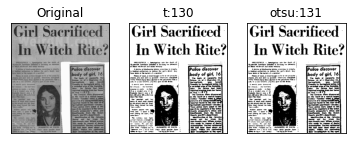

In [5]:
img = cv2.imread('img/scaned_paper.jpg', cv2.IMREAD_GRAYSCALE)
_, t_130 = cv2.threshold(img, 130, 255, cv2.THRESH_BINARY)
t, t_otsu = cv2.threshold(img, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print('otsu threshold:', t)

imgs = {'Original': img, 't:130':t_130, 'otsu:%d'%t: t_otsu}
for i, (key, value) in enumerate(imgs.items()):
    plt.subplot(1, 3, i+1)
    plt.title(key)
    plt.imshow(value, cmap = 'gray')
    plt.xticks([]); plt.yticks([])
plt.show()


## 적응형 스레시홀드 적용
- 이미지의 조명, 환경이 일정하지 않을 때
- block_size: 영역으로 나눌 이웃의 크기(n X n), 홀수(3, 5, 7 ...)
- C: 계산된 경계 값 결과에서 가감할 상수(음수 가능)

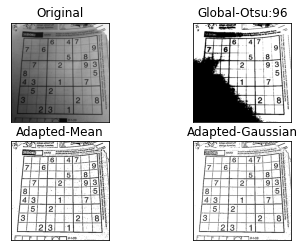

In [6]:
blk_size = 9
c =  5
img = cv2.imread('img/sudoku.png', cv2.IMREAD_GRAYSCALE)

ret, th1 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                            cv2.THRESH_BINARY, blk_size, c)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                            cv2.THRESH_BINARY, blk_size, c)

imgs = {'Original': img, 'Global-Otsu:%d'%ret: th1,
        'Adapted-Mean': th2, 'Adapted-Gaussian': th3}

for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2, 2, i+1)
    plt.title(k)
    plt.imshow(v, 'gray')
    plt.xticks([]), plt.yticks([])
plt.show()

## 알파 블렌딩

### 이미지 단순 합성

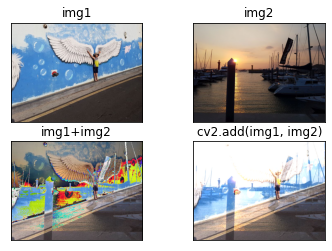

In [7]:
img1 = cv2.imread('img/wing_wall.jpg')
img2 = cv2.imread('img/yate.jpg')

img3 = img1 + img2
img4 = cv2.add(img1, img2)

imgs = {'img1': img1, 'img2': img2, 'img1+img2': img3, 'cv2.add(img1, img2)': img4}

for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2, 2, i+1)
    plt.imshow(v[:, :, ::-1])
    plt.title(k)
    plt.xticks([]); plt.yticks([])
plt.show()

### 50% 알파 블렌딩

In [8]:
alpha = 0.5

img1 = cv2.imread('img/wing_wall.jpg')
img2 = cv2.imread('img/yate.jpg')

blended = img1 * alpha + img2 * (1-alpha)
blended = blended.astype(np.uint8)
cv2.imshow('img1 * alpha + img2 * (1-alpha)', blended)

dst = cv2.addWeighted(img1, alpha, img2, (1-alpha), 0)
cv2.imshow('cv2.addWeighted', dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

## 차영상

In [19]:
img1 = cv2.imread('img/robot_arm1.jpg')
img2 = cv2.imread('img/robot_arm2.jpg')
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

diff = cv2.absdiff(img1_gray, img2_gray)

_, diff = cv2.threshold(diff, 1, 255, cv2.THRESH_BINARY)
diff_red = cv2.cvtColor(diff, cv2.COLOR_GRAY2BGR)
diff_red[:, :, 0] = 0

spot = cv2.bitwise_xor(img2, diff_red)

cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('diff', diff)
cv2.imshow('spot', spot)
cv2.waitKey()
cv2.destroyAllWindows()

## 히스토그램

### 그레이 스케일 1채널 히스토그램

(256, 1)
270000.0 (450, 600)


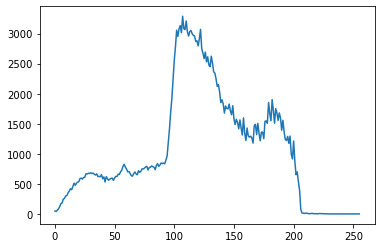

In [9]:
img = cv2.imread('img/mountain.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imshow('img', img)

hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist)
print(hist.shape)
print(hist.sum(), img.shape)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 컬러 히스토그램

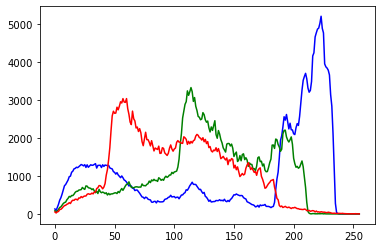

In [5]:
img = cv2.imread('img/mountain.jpg')
cv2.imshow('img', img)

channels = cv2.split(img)
colors = ('b', 'g', 'r')
for (ch, color) in zip(channels, colors):
    hist = cv2.calcHist([ch], [0], None, [256], [0, 256])
    plt.plot(hist, color = color)
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()

### 히스토그램 정규화

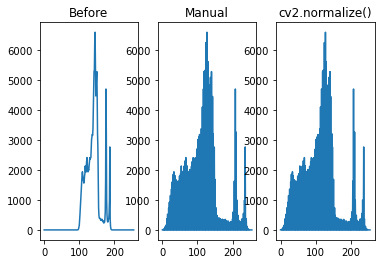

In [4]:
img = cv2.imread('img/abnormal.jpg', cv2.IMREAD_GRAYSCALE)

img_f = img.astype(np.float32)
img_norm = ((img_f - img_f.min()) * (255) / (img_f.max() - img_f.min()))
img_norm = img_norm.astype(np.uint8)

img_norm2 = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)

hist = cv2.calcHist([img], [0], None, [256], [0, 255])
hist_norm = cv2.calcHist([img_norm], [0], None, [256], [0, 255])
hist_norm2 = cv2.calcHist([img_norm2], [0], None, [256], [0, 255])

cv2.imshow('Before', img)
cv2.imshow('Manual', img_norm)
cv2.imshow('cv2.normalize()', img_norm2)

hists = {'Before': hist, 'Manual': hist_norm, 'cv2.normalize()': hist_norm2}
for i, (k, v) in enumerate(hists.items()):
    plt.subplot(1, 3, i+1)
    plt.title(k)
    plt.plot(v)
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()

## 이퀄라이즈

### 그레이 스케일 이퀄라이즈 적용

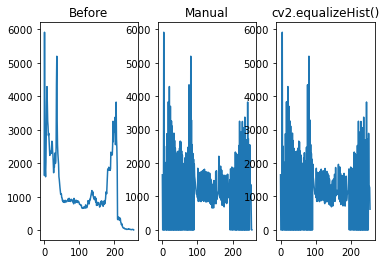

In [2]:
img = cv2.imread('img/yate.jpg', cv2.IMREAD_GRAYSCALE)
rows, cols = img.shape[:2]

hist = cv2.calcHist([img], [0], None, [256], [0, 256])
cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min()) / (rows * cols) * 255
cdf = np.ma.filled(cdf_m, 0).astype('uint8')
img2 = cdf[img]

img3 = cv2.equalizeHist(img)

hist2 = cv2.calcHist([img2], [0], None, [256], [0, 256])
hist3 = cv2.calcHist([img3], [0], None, [256], [0, 256])

cv2.imshow('Before', img)
cv2.imshow('Manual', img2)
cv2.imshow('cv2.equalizeHist()', img3)

hists = {'Before': hist, 'Manual': hist2, 'cv2.equalizeHist()':hist3}
for i, (k, v) in enumerate(hists.items()):
    plt.subplot(1, 3, i+1)
    plt.title(k)
    plt.plot(v)
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()

### 컬러 이미지에 대한 이퀄라이즈 적용

In [3]:
img = cv2.imread('img/yate.jpg')

img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])

img2 = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

cv2.imshow('Before', img)
cv2.imshow('After', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

### CLAHE
- 이미지 전체에 이퀄라이즈를 적용했을 때 너무 밝은 부분이 날아가는 현상을 막기 위함

In [4]:
img = cv2.imread('img/bright.jpg')
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

img_eq = img_yuv.copy()
img_eq[:, :, 0] = cv2.equalizeHist(img_eq[:, :, 0])
img_eq = cv2.cvtColor(img_eq, cv2.COLOR_YUV2BGR)

img_clahe = img_yuv.copy()
clahe = cv2.createCLAHE(clipLimit = 3.0, tileGridSize = (8, 8))
img_clahe[:, :, 0] = clahe.apply(img_clahe[:, :, 0])
img_clahe = cv2.cvtColor(img_clahe, cv2.COLOR_YUV2BGR)

cv2.imshow('Before', img)
cv2.imshow('CLAHE', img_clahe)
cv2.imshow('equalizeHist', img_eq)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 모션 감시 CCTV

In [3]:
thresh = 25
max_diff = 5

a, b, c = None, None, None
cap = cv2.VideoCapture('img/walking.avi')
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 480)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 320)

if cap.isOpened():
    ret, a = cap.read()
    ret, b = cap.read()
    
    while ret:
        ret, c = cap.read()
        draw = c.copy()
        if not ret:
            break
            
        a_gray = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
        b_gray = cv2.cvtColor(b, cv2.COLOR_BGR2GRAY)
        c_gray = cv2.cvtColor(c, cv2.COLOR_BGR2GRAY)
        
        diff1 = cv2.absdiff(a_gray, b_gray)
        diff2 = cv2.absdiff(b_gray, c_gray)
        
        ret, diff1_t = cv2.threshold(diff1, thresh, 255, cv2.THRESH_BINARY)
        ret, diff2_t = cv2.threshold(diff2, thresh, 255, cv2.THRESH_BINARY)
        
        diff = cv2.bitwise_and(diff1_t, diff2_t)
        
        k = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
        diff = cv2.morphologyEx(diff, cv2.MORPH_OPEN, k)
        
        diff_cnt = cv2.countNonZero(diff)
        if diff_cnt > max_diff:
            nzero = np.nonzero(diff)
            cv2.rectangle(draw, (min(nzero[1]), min(nzero[0])),
                          (max(nzero[1]), max(nzero[0])), (0, 255, 0), 2)
            cv2.putText(draw, "Motion Detected", (10, 30),
                        cv2.FONT_HERSHEY_DUPLEX, 0.5, (0, 0, 255))
            
        stacked = np.hstack((draw, cv2.cvtColor(diff, cv2.COLOR_GRAY2BGR)))
        cv2.imshow('motion sensor', stacked)
        
        a = b
        b = c
        
        if cv2.waitKey(1) & 0xFF == 27:
            break

AttributeError: 'NoneType' object has no attribute 'copy'